Deep Learning on Wine Dataset

In [42]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

In [43]:
df = pd.read_excel('wine-red-white1.xlsx')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [75]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [77]:
df.shape

(6497, 13)

In [44]:
# df.drop('Id',axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [45]:
df.type.unique()

array([0, 1], dtype=int64)

In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<AxesSubplot:>

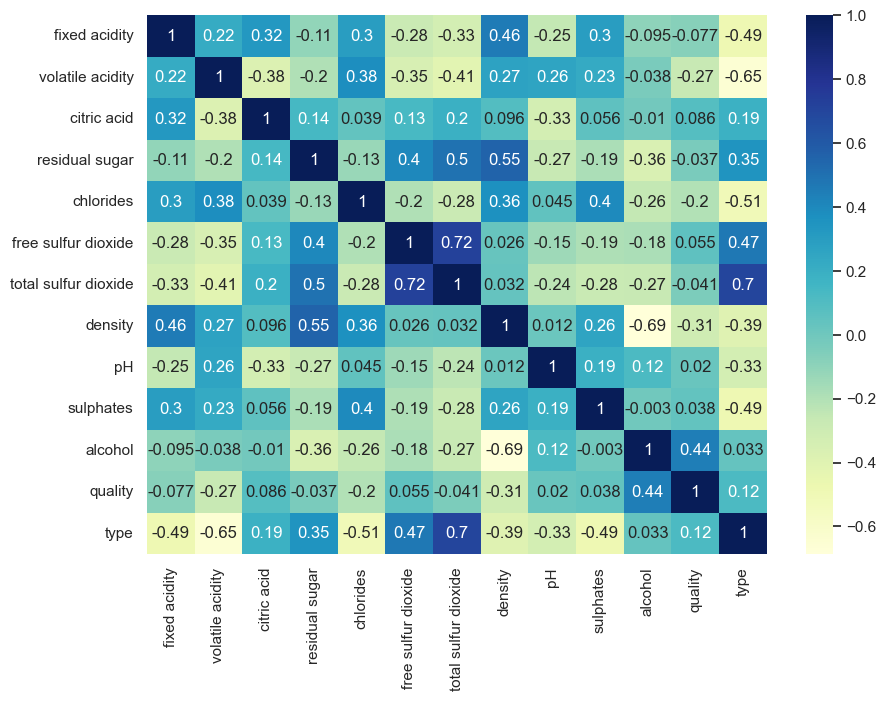

In [48]:
sns.set (rc = {'figure.figsize':(10, 7)})
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [90]:
x = df.drop(['type','quality'],axis=1)
y = df['type']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)

(4352, 11)
(2145, 11)


In [93]:
print(y_train)

1700    1
5199    1
3340    1
86      0
5587    1
       ..
3772    1
5191    1
5226    1
5390    1
860     0
Name: type, Length: 4352, dtype: int64


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [95]:
num_labels = len(np.unique(y_train))
print(num_labels)

2


In [96]:
model = Sequential()
model.add(Dense(12, activation='relu' , input_shape=(11,)))

model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [97]:
model.output_shape

(None, 1)

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                144       
                                                                 
 dense_17 (Dense)            (None, 8)                 104       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_16_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_16',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_17',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bia

In [100]:
model.get_weights()

[array([[-0.21167305,  0.14813203, -0.35088286,  0.144624  ,  0.31004512,
          0.08644307, -0.4510322 ,  0.20638198, -0.17615521, -0.29414225,
         -0.41566584, -0.37617138],
        [ 0.35357577,  0.03042197,  0.08344269, -0.27736545, -0.49127156,
         -0.18609944,  0.20686996,  0.21300137, -0.17867517, -0.2887085 ,
          0.5079729 ,  0.39160258],
        [ 0.43893063, -0.37223944,  0.48894668,  0.37968868, -0.0024032 ,
         -0.05951339, -0.12910873, -0.09059563,  0.46651506, -0.1249862 ,
          0.4579584 , -0.45653075],
        [-0.15114918,  0.43967587,  0.35643095,  0.36172545,  0.29997545,
          0.04765958, -0.14838323,  0.2701035 , -0.01614031,  0.0243147 ,
         -0.13260168,  0.3787005 ],
        [ 0.4470411 , -0.17998558,  0.3172348 ,  0.17382115,  0.47643566,
         -0.28947568, -0.49349478,  0.30986512, -0.4388007 , -0.48694775,
          0.4553483 , -0.21190539],
        [ 0.32821113,  0.3245762 ,  0.4968689 , -0.34913588, -0.29783648,
      

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [102]:
model.fit(X_train_sc, y_train, epochs=10, batch_size=1,verbose=1)

Epoch 1/10
4352/4352 [==============================] - 9s 2ms/step - loss: 0.1020 - accuracy: 0.9646
Epoch 2/10
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0260 - accuracy: 0.9954
Epoch 3/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0210 - accuracy: 0.9961
Epoch 4/10
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0185 - accuracy: 0.9963
Epoch 5/10
4352/4352 [==============================] - 15s 3ms/step - loss: 0.0162 - accuracy: 0.9968
Epoch 6/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0149 - accuracy: 0.9972
Epoch 7/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 8/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0133 - accuracy: 0.9975
Epoch 9/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0129 - accuracy: 0.9972
Epoch 10/10
4352/4352 [==============================] - 6s 1ms/step - loss: 0.01

In [105]:
score = model.evaluate(X_test_sc, y_test,verbose=1)

print(score)

# evaluate the model
scores = model.evaluate(X_test_sc, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


68/68 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9953
[0.02553658001124859, 0.9953380227088928]
68/68 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9953

loss: 2.55%

accuracy: 99.53%


In [107]:
y_pred = model.predict(X_test_sc)
y_pred = [round(x[0]) for x in y_pred]

68/68 [==============================] - 0s 3ms/step


In [108]:
y_pred[:5]

[1, 0, 1, 1, 1]

In [109]:
y_test[:5]

3103    1
1419    0
4761    1
4690    1
4032    1
Name: type, dtype: int64

In [110]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 548,    9],
       [   1, 1587]], dtype=int64)

In [111]:
precision_score(y_test, y_pred)

0.9943609022556391

In [112]:
recall_score(y_test, y_pred)

0.9993702770780857

In [113]:
f1_score(y_test,y_pred)

0.9968592964824121

In [114]:
cohen_kappa_score(y_test, y_pred)

0.9878179265599869